In [1]:
import layoutparser as lp
import cv2
import numpy as np
import gradio as gr
import time

In [20]:
def lp_fn(model_label, image_path):

    start_time = time.perf_counter()
    #load image
    image = cv2.imread(image_path)
    image = image[..., ::-1]

    #load model
    model_map = {"Layout: faster_rcnn": "PubLayNet: faster_rcnn_R_50_FPN_3x", 
                 "Layout: mask_rcnn1": "PubLayNet: mask_rcnn_R_50_FPN_3x", 
                 "Layout: mask_rcnn2": "PubLayNet: mask_rcnn_X_101_32x8d_FPN_3x", 
                 "Table: faster-rcnn1": "TableBank: faster_rcnn_R_50_FPN_3x", 
                 "Table: faster-rcnn2": "TableBank: faster_rcnn_R_101_FPN_3x"}

    model_name = model_map[model_label]

    if model_label == "Layout: faster_rcnn":
        model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', 
                                         extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                         label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

    if model_label == "Layout: mask_rcnn1":
        model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config', 
                                         extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                         label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

    if model_label == "Layout: mask_rcnn2":
        model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config', 
                                         extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                         label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

    if model_label == "Table: faster-rcnn1":
        model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_50_FPN_3x/config',
                                         extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                         label_map={0: "Table"})

    if model_label == "Table: faster-rcnn2":
        model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_101_FPN_3x/config',
                                         extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                         label_map={0: "Table"})
    
    layout = model.detect(image)

    output_img = lp.draw_box(image, layout, box_width=3, box_alpha=0.3, show_element_type=True, 
                id_font_size=40, id_text_background_color='white',id_text_background_alpha=0.7,
                color_map = {"Text":"red", "Title":"blue", "List":"green", "Table":"purple", "Figure":"pink"})

    # seconds
    run_time = time.perf_counter() - start_time
    
    return model_name, run_time, output_img

## Function test

In [12]:
%%time
model_name, run_time, output_img = lp_fn("Layout: faster_rcnn", "medical_chart.png")

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


CPU times: user 6.69 s, sys: 1.21 s, total: 7.91 s
Wall time: 6.64 s


In [13]:
print(model_name)
print(run_time)

PubLayNet: faster_rcnn_R_50_FPN_3x
6.614979910999978


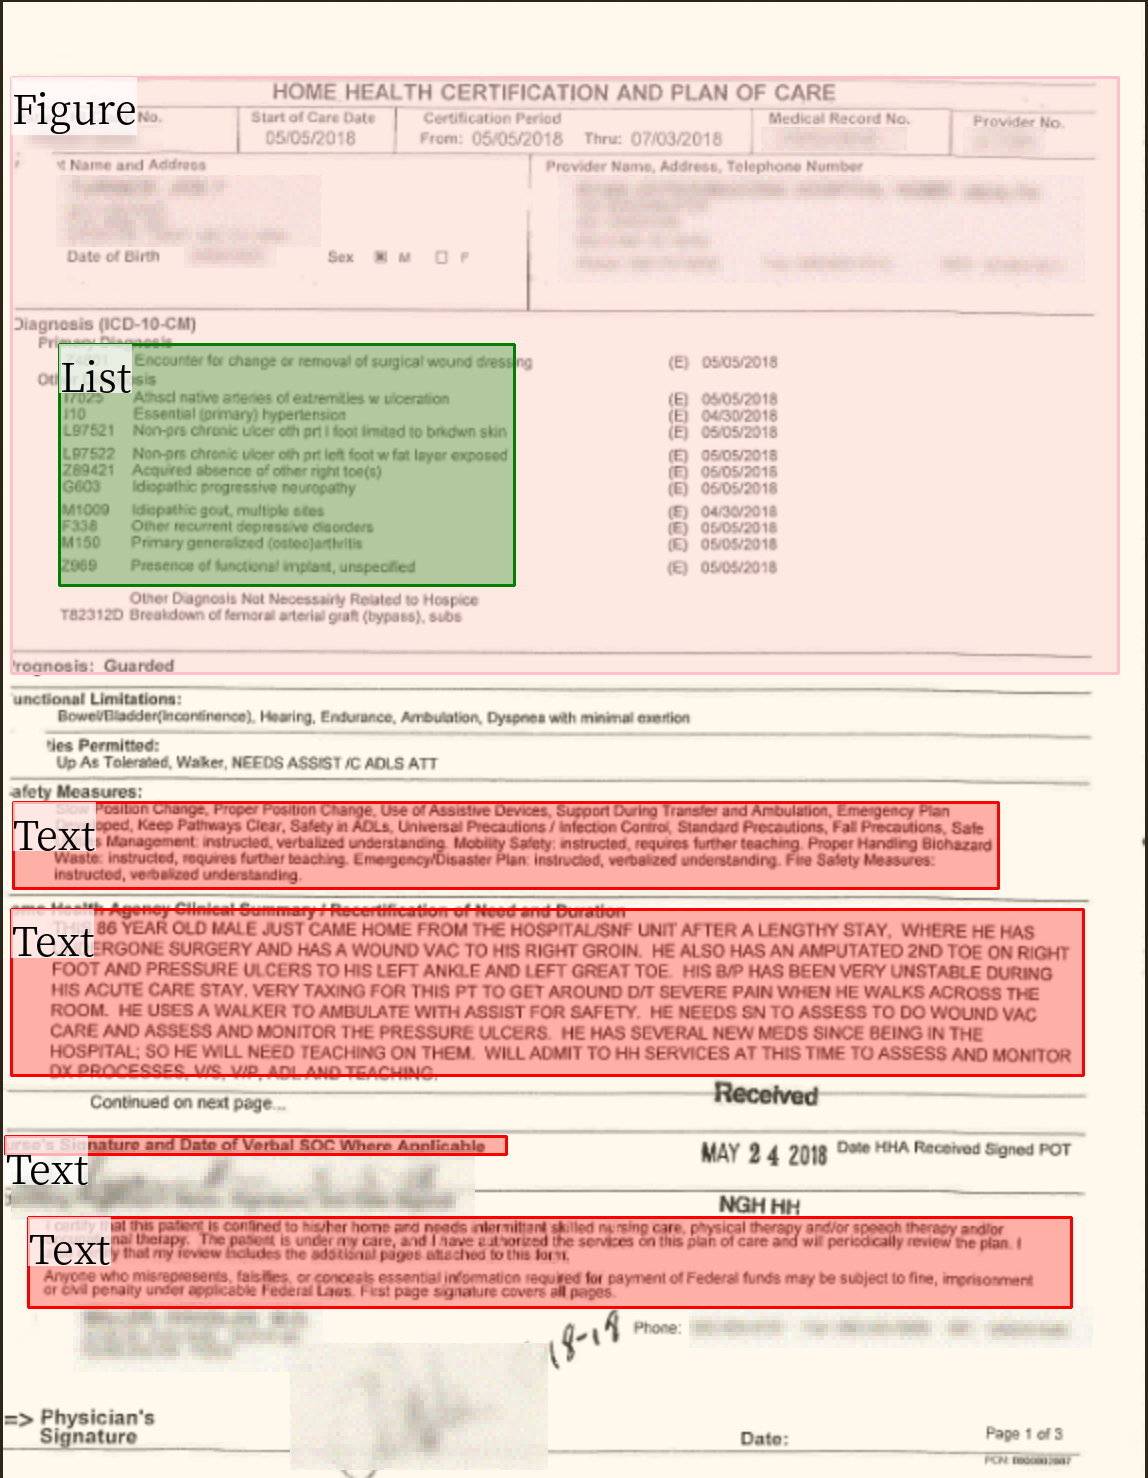

In [14]:
display(output_img)

## gradio demo

In [23]:
title = "Interactive demo: Document Layout Analysis with LayoutParser (Detectron2)"
description = "Demo for LayoutParser: a unified toolkit for Deep Learning Based Document Image Analysis. To use it, simply upload an image or use the example image below and click 'Submit'. Results will show up in a few seconds. If you want to make the output bigger, right-click on it and select 'Open image in new tab'."
article="LayoutParser Model Zoo: [https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html](https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html)</h3>"
#css = ".output-image, .input-image, .image-preview {height: 600px !important}"

iface = gr.Interface(fn=lp_fn,
                     inputs=[gr.Dropdown(
                                ["Layout: faster_rcnn", "Layout: mask_rcnn1", "Layout: mask_rcnn2", "Table: faster-rcnn1", "Table: faster-rcnn2"], 
                                label="Select use case and model type"),
                             gr.Image(type='filepath', label='Doc image input')],
                     outputs=[gr.Text(label='model name'),
                              gr.Text(label='run time (seconds)'),
                              gr.Image(label="annotated doc image")],
                     title=title,
                     description=description,
                     #examples=examples,
                     article=article,
                     #css=css,
                     allow_flagging="never")

In [24]:
iface.launch(share=False)

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


config.yaml?dl=1: 8.19kB [00:03, 2.69kB/s]
model_final.pth?dl=1: 330MB [00:36, 9.15MB/s]                                                                                                                                                                                                         
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
config.yaml?dl=1: 8.19kB [00:04, 1.93kB/s]
model_final.pth?dl=1: 482MB [00:47, 10.2MB/s]                                                                                                                                                                                                         
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel